## Simulation with Bayesian Information Criterion:

### Estimating the number of componenets of NMF:
<img src="exp_5comp.PNG" alt="NMF on documents" style="width: 80%"/>



In [1]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse import isspmatrix
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.decomposition import NMF

In [2]:
# ==============================
# Simulation

# Assumptions
n=40
k=5 # Number of components (to be estimated)
M= 1600 # Total number of data
np.random.seed(12345)

In [3]:
# Parameters to be estimated
# A_norm: n by k
# B_norm: k by n
# r_prob: k probabilities with sum 1

In [4]:
A_norm = np.zeros((n,k))
A_norm[0,0] = 1.0
A_norm[1,1] = 0.5
A_norm[2,1] = 0.5
A_norm[3,2] = 1.0
A_norm[4,3] = 0.7
A_norm[5,3] = 0.3
A_norm[6,4] = 0.6
A_norm[7,4] = 0.2
A_norm[8,4] = 0.1
A_norm[9,4] = 0.1
A_norm

array([[1. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 0.7, 0. ],
       [0. , 0. , 0. , 0.3, 0. ],
       [0. , 0. , 0. , 0. , 0.6],
       [0. , 0. , 0. , 0. , 0.2],
       [0. , 0. , 0. , 0. , 0.1],
       [0. , 0. , 0. , 0. , 0.1],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0

In [5]:
B_norm = np.zeros((k,n))
B_norm[0,1] = 0.5
B_norm[0,2] = 0.5
B_norm[1,3] = 1.0
B_norm[2,4] = 0.3
B_norm[2,5] = 0.7
B_norm[3,6] = 0.4
B_norm[3,7] = 0.3
B_norm[3,8] = 0.2
B_norm[3,9] = 0.1
B_norm[4,0] = 1.0

B_norm

array([[0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. ],
       [0. , 0. , 0. , 0. , 0.3, 0.7, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.4, 0.3, 0.2, 0.1, 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 

In [6]:
r_prob = np.array([0.3,0.1,0.1,0.2,0.3])
r_prob

array([0.3, 0.1, 0.1, 0.2, 0.3])

In [7]:
np.sqrt(M * r_prob)

array([21.9089023 , 12.64911064, 12.64911064, 17.88854382, 21.9089023 ])

In [8]:
np.diag(np.sqrt(M * r_prob))

array([[21.9089023 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , 12.64911064,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , 12.64911064,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 17.88854382,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 21.9089023 ]])

In [9]:
# Construct unnormalized A, B
A = np.dot(A_norm, np.diag(np.sqrt(M * r_prob)))
B = np.dot(np.diag(np.sqrt(M * r_prob)), B_norm)
print(A)
print(B)

[[21.9089023   0.          0.          0.          0.        ]
 [ 0.          6.32455532  0.          0.          0.        ]
 [ 0.          6.32455532  0.          0.          0.        ]
 [ 0.          0.         12.64911064  0.          0.        ]
 [ 0.          0.          0.         12.52198067  0.        ]
 [ 0.          0.          0.          5.36656315  0.        ]
 [ 0.          0.          0.          0.         13.14534138]
 [ 0.          0.          0.          0.          4.38178046]
 [ 0.          0.          0.          0.          2.19089023]
 [ 0.          0.          0.          0.          2.19089023]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.  

In [10]:
# Construct the matrix of average frequencies
# N.B. A, B are dense, but X should be sparse.

tmp = [(i,j,np.dot(A[i,:],B[:,j])) for i in np.nonzero(A)[0] for j in np.nonzero(B)[1]]
row_idx = [x[0] for x in tmp if x != 0.0]
col_idx = [x[1] for x in tmp if x != 0.0]
dat = [x[2] for x in tmp if x != 0.0]
print(tmp)

[(0, 1, 240.0), (0, 2, 240.0), (0, 3, 0.0), (0, 4, 0.0), (0, 5, 0.0), (0, 6, 0.0), (0, 7, 0.0), (0, 8, 0.0), (0, 9, 0.0), (0, 0, 0.0), (1, 1, 0.0), (1, 2, 0.0), (1, 3, 80.00000000000001), (1, 4, 0.0), (1, 5, 0.0), (1, 6, 0.0), (1, 7, 0.0), (1, 8, 0.0), (1, 9, 0.0), (1, 0, 0.0), (2, 1, 0.0), (2, 2, 0.0), (2, 3, 80.00000000000001), (2, 4, 0.0), (2, 5, 0.0), (2, 6, 0.0), (2, 7, 0.0), (2, 8, 0.0), (2, 9, 0.0), (2, 0, 0.0), (3, 1, 0.0), (3, 2, 0.0), (3, 3, 0.0), (3, 4, 48.0), (3, 5, 112.0), (3, 6, 0.0), (3, 7, 0.0), (3, 8, 0.0), (3, 9, 0.0), (3, 0, 0.0), (4, 1, 0.0), (4, 2, 0.0), (4, 3, 0.0), (4, 4, 0.0), (4, 5, 0.0), (4, 6, 89.60000000000001), (4, 7, 67.2), (4, 8, 44.800000000000004), (4, 9, 22.400000000000002), (4, 0, 0.0), (5, 1, 0.0), (5, 2, 0.0), (5, 3, 0.0), (5, 4, 0.0), (5, 5, 0.0), (5, 6, 38.400000000000006), (5, 7, 28.8), (5, 8, 19.200000000000003), (5, 9, 9.600000000000001), (5, 0, 0.0), (6, 1, 0.0), (6, 2, 0.0), (6, 3, 0.0), (6, 4, 0.0), (6, 5, 0.0), (6, 6, 0.0), (6, 7, 0.0), (6,

In [11]:
X_avg = csr_matrix((dat, (row_idx, col_idx)), shape=(n,n))
X_avg.toarray()
print(isspmatrix(X_avg))

# For debug, compare them:
print(X_avg.toarray())
print(np.dot(A,B))

True
[[  0. 240. 240. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0. 240. 240. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [12]:
noise = 1.0
X_avg = np.dot(A,B) + noise
X = np.zeros((n,n))
for i in range(n):
  for j in range(n):
    X[i,j] = np.random.poisson(X_avg[i,j],1)
X

array([[  1., 225., 244., ...,   1.,   1.,   0.],
       [  1.,   4.,   1., ...,   1.,   2.,   3.],
       [  3.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  1.,   1.,   0., ...,   1.,   0.,   2.],
       [  0.,   2.,   1., ...,   0.,   0.,   2.],
       [  1.,   0.,   1., ...,   1.,   0.,   1.]])

In [13]:
# ==============================
# Model of NMF

n_components = 5

# m = NMF(n_components = n_components,
#         init = 'random', random_state = 123,
#         alpha = 0.0, l1_ratio = 1.0, verbose=True).fit(X)

m = NMF(n_components = n_components, beta_loss = 'kullback-leibler', solver = 'mu',
        init = 'random', random_state = 123,
        alpha = 0.0, l1_ratio = 1.0, verbose=True).fit(X)

m.get_params()
print("#iterations= %d" % m.n_iter_)
print("reconstruction error= %e" % m.reconstruction_err_)

W = m.fit_transform(X)
H = m.components_
print(W)
print(H)


Epoch 10 reached after 0.003 seconds, error: 47.941274
Epoch 20 reached after 0.006 seconds, error: 45.564593
Epoch 30 reached after 0.009 seconds, error: 45.402030
Epoch 40 reached after 0.010 seconds, error: 45.389740
Epoch 50 reached after 0.012 seconds, error: 45.386881
#iterations= 50
reconstruction error= 4.538688e+01
Epoch 10 reached after 0.001 seconds, error: 47.941274
Epoch 20 reached after 0.002 seconds, error: 45.564593
Epoch 30 reached after 0.004 seconds, error: 45.402030
Epoch 40 reached after 0.006 seconds, error: 45.389740
Epoch 50 reached after 0.008 seconds, error: 45.386881
[[2.97726318e-06 7.81861173e-10 2.52740117e+01 6.65862353e-04
  1.08292445e-16]
 [1.38581025e-02 9.62183728e-03 2.69317761e-01 7.79490802e+00
  4.06418866e-08]
 [1.10863349e-01 2.49095229e-13 1.75392126e-58 7.51498713e+00
  1.90368517e-13]
 [7.21140421e+00 7.93107359e-01 2.04276742e-01 7.62954644e-18
  2.20818148e-01]
 [4.13633391e-25 4.12495751e-08 1.32684379e-05 4.44763414e-03
  1.34741351e+01]

In [14]:
# Look at the result more closely
np.dot(W, H)

array([[9.41719262e-01, 2.22072649e+02, 2.47143159e+02, ...,
        1.02853676e+00, 1.03286911e+00, 1.32946406e-04],
       [1.01149436e+00, 2.36728514e+00, 2.63354749e+00, ...,
        4.94932378e-01, 1.03590992e+00, 1.56608241e+00],
       [2.49626709e+00, 5.67136073e-03, 3.01543366e-13, ...,
        4.71723136e-01, 1.00672750e+00, 1.50529963e+00],
       ...,
       [1.02113096e+00, 4.78829633e-01, 5.38769051e-01, ...,
        1.30111362e+00, 4.61784117e-01, 1.56189574e+00],
       [3.93180433e-02, 1.41250637e+00, 1.57086795e+00, ...,
        9.44458753e-01, 2.89401678e-01, 1.13899996e+00],
       [9.42565379e-01, 4.74940947e-01, 5.33161043e-01, ...,
        9.59307204e-01, 3.39346135e-01, 1.13895362e+00]])

In [15]:
# Normalize W, H

W_norm = W / np.sum(W,axis=0,keepdims=True)
#print(np.sum(W_norm, axis=0))

H_norm = H / np.sum(H,axis=1,keepdims=True)
#print(np.sum(H_norm, axis=1))

W_sum = np.sum(W,axis=0,keepdims=True).ravel()
H_sum = np.sum(H,axis=1,keepdims=True).ravel()
print(W_sum)
print(H_sum)
# "Probability" of each component
print(W_sum * H_sum / np.dot(W_sum, H_sum))

print(np.dot(W_sum, H_sum))
# This should be equal to
print(np.sum(X))

[31.71808146 35.76471719 29.72679189 19.16244354 27.40304526]
[23.5635157  29.35425453 20.37643497 12.56063424 16.3976444 ]
[0.24163903 0.33942664 0.19583771 0.07781844 0.14527817]
3093.0
3093.0


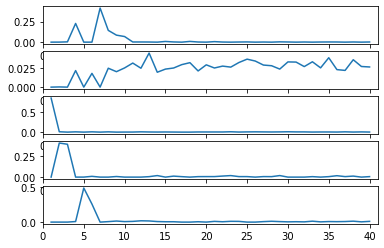

In [16]:
plt.figure()
for i in range(n_components):
  plt.subplot(n_components,1,i+1)
  plt.plot(np.arange(n)+1, W_norm[:,i])
  plt.xlim([0,W_norm.shape[0]+1])
  
# plt.show(block=False)

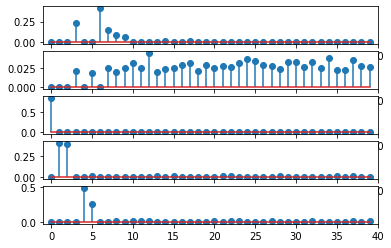

In [17]:
plt.figure()
for i in range(n_components):
  plt.subplot(n_components,1,i+1)
  plt.stem(W_norm[:,i], use_line_collection=True)
  plt.xlim([-1,W_norm.shape[0]])

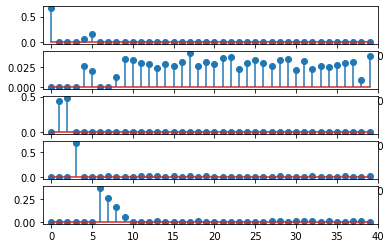

In [18]:
plt.figure()
for i in range(n_components):
  plt.subplot(n_components,1,i+1)
  plt.stem(H_norm[i,:], use_line_collection=True)
  plt.xlim([-1,H_norm.shape[1]])

In [19]:
# ----------
# BIC (Bayesian Information Criterion)

ks = np.array(range(1,10))  # #components
bic1 = np.zeros(len(ks))  # BIC 1st term: minus of log likelihood
bic2 = np.zeros(len(ks))  # BIC 2nd term: penalty or Occam's factor

for i in range(len(ks)):
  n_components = ks[i]
  m = NMF(n_components = n_components, beta_loss = 'kullback-leibler', solver = 'mu',
          init = 'random', random_state = 123,
          alpha = 0.0, l1_ratio = 1.0, verbose=True).fit(X)
  bic1[i] = 0.5 * (m.reconstruction_err_ ** 2)
  bic2[i] = 2 * n * n_components * np.log(n)

bic = bic1 + bic2

Epoch 10 reached after 0.002 seconds, error: 83.894092
Epoch 20 reached after 0.005 seconds, error: 83.894092
Epoch 10 reached after 0.002 seconds, error: 68.884332
Epoch 20 reached after 0.005 seconds, error: 68.815875
Epoch 30 reached after 0.008 seconds, error: 68.813591
Epoch 10 reached after 0.001 seconds, error: 59.508032
Epoch 20 reached after 0.002 seconds, error: 58.450468
Epoch 30 reached after 0.004 seconds, error: 58.429593
Epoch 40 reached after 0.005 seconds, error: 58.427370
Epoch 10 reached after 0.001 seconds, error: 56.811954
Epoch 20 reached after 0.004 seconds, error: 54.461431
Epoch 30 reached after 0.005 seconds, error: 54.398446
Epoch 40 reached after 0.007 seconds, error: 54.370014
Epoch 50 reached after 0.009 seconds, error: 54.359676
Epoch 10 reached after 0.001 seconds, error: 47.941274
Epoch 20 reached after 0.003 seconds, error: 45.564593
Epoch 30 reached after 0.004 seconds, error: 45.402030
Epoch 40 reached after 0.006 seconds, error: 45.389740
Epoch 50 r

C:\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


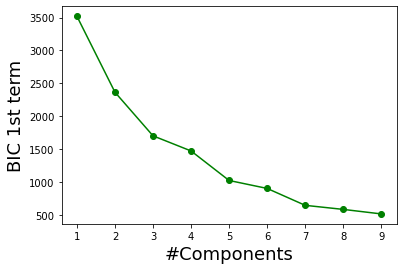

In [20]:
# plotting each BIC terms from the equation bic = bic1 + bic2

plt.figure()
plt.plot(ks, bic1, color="green", marker='o')
plt.xticks(ks)
plt.xlabel("#Components", fontsize=18)
plt.ylabel("BIC 1st term", fontsize=18)
plt.savefig('BIC1.eps', format='eps')
# plt.show()

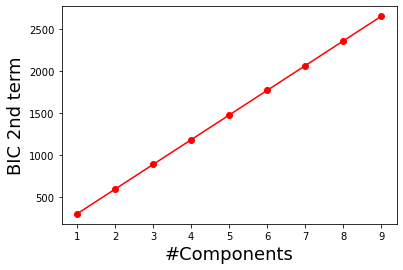

In [21]:
plt.figure()
plt.plot(ks, bic2, color="red", marker='o')
plt.xticks(ks)
plt.xlabel("#Components", fontsize=18)
plt.ylabel("BIC 2nd term", fontsize=18)
plt.savefig('BIC2.eps', format='eps')
# plt.show()

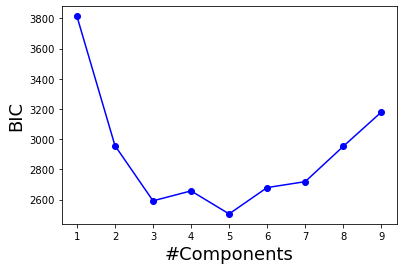

In [23]:
plt.figure()
plt.plot(ks, bic, color="blue", marker='o')
plt.xticks(ks)
plt.xlabel("#Components", fontsize=18)
plt.ylabel("BIC", fontsize=18)
plt.savefig('BIC_comp5.eps', format='eps')
# plt.show()